# Apocalipsis Zombie: Aprendiendo a crear nuestras ecuaciones diferenciales

En esta ocasión vamos a modelar un apocalipsis Zombie. En la lección anterior aprendimos a modelar e interpretar los resultados de la dinámica amorosa entre Romeo y Julieta, sin embargo nunca vimos cómo se hacen las ecuaciones. Para ello estudiaremos el modelo comúnmente llamado SIR (Suceptible, Infected, Removed (death)). En nuestro caso S será cualquier humano expuesto a los zombies, I serán los zombies (por eso la Z) y R son los fallecidos  (por eso la F).

![Modelo SIR](SIRModel.png "titulo")

In [1]:
# para que las gráficas salgan en esta página
%matplotlib inline
# para manejar matrices y demás datos numéricos
import numpy as np
# para graficar
import matplotlib.pyplot as plt
# para resolver ecuaciones diferenciales
from scipy.integrate import odeint
# para que nuestras gráficas se vean más bonitas
import seaborn as sns
# para hacer el tamaño de fuente más grande
sns.set(font_scale=2)

In [2]:
#Definimos nuestros parametros:

P = 0       
gamma = 0.0001  
beta = 0.0095  
delta = 0.0001  
alfa = 0.0001


In [3]:
#Codificamos nuestro sistema de ecuaciones:

def apocapilsis_zombie(y, t):
    	# Desempacamos valores iniciales
        Si = y[0] # personas
        Zi = y[1] # zombies
        Fi = y[2] # fallecidos
        # Ecuaciones
        dS = P - beta*Si*Zi - gamma*Si
        dZ = beta*Si*Zi + delta*Fi - alfa*Zi
        dF = gamma*Si + alfa*Si*Zi - delta*Fi
        return [dS, dZ, dF]

In [4]:
#Definimos las condiciones iniciales:

S0 = 500.               # población inicial de gente sana
Z0 = 0                  # población inicial de zombies
R0 = 0                  # población inicial de fallecidos
y0 = [S0, Z0, R0]       # empacamos condiciones iniciales
t  = np.linspace(0, 20., 1000)   # vector de tiempo


In [6]:
#Finalmente, resolvemos el sistema de ecuaciones numéricamente:

In [5]:
soln = odeint(apocapilsis_zombie, y0, t)
# Desempacar las poblaciones
S = soln[:, 0]
Z = soln[:, 1]
F = soln[:, 2]

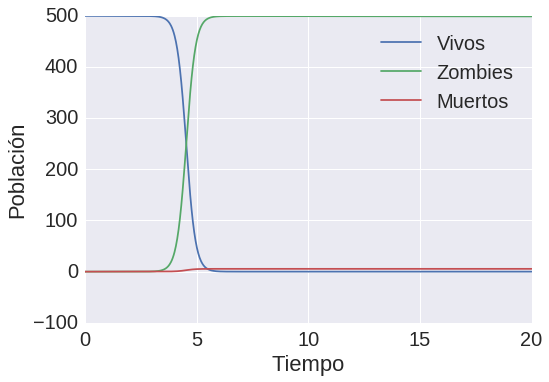

In [6]:
# plot results
plt.figure()
plt.plot(t, S, label='Vivos')
plt.plot(t, Z, label='Zombies')
plt.plot(t, F, label='Muertos')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend(loc=0)

# Graficando el espacio fase

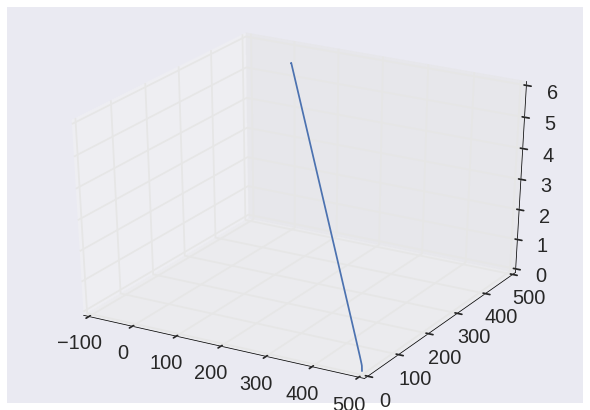

In [7]:


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.plot(S, Z, F)

plt.show()



## Caos es la sensibilidad a condiciones iniciales  
https://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/

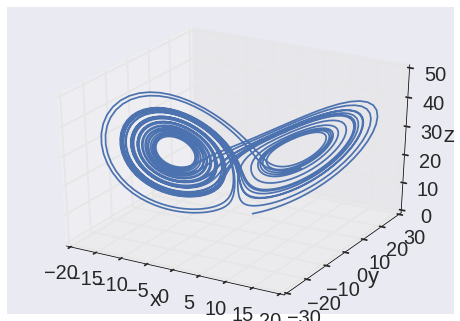

In [27]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def Lorenz(state,t):
    
    
#unpack the state vector
    x = state[0]
    y = state[1]
    z = state[2]

# these are our constants
    sigma = 10.0
    rho = 28.0
    beta = 8.0/3.0

# compute state derivatives
    xd = sigma * (y-x)
    yd = (rho-z)*x - y
    zd = x*y - beta*z

# return the state derivative
    return [xd, yd, zd]

state0 = [2.0, 3.0, 4.0]
t = np.arange(0.0, 30.0, 0.01)

state = odeint(Lorenz, state0, t)

# do some fancy 3D plotting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(state[:,0],state[:,1],state[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#plt.show()
